In [1]:
# we've lurned about the increase of dimentionnality by adding additional features but this may increase the risk of overfitting and add more complexity to our problem => reducing the number of features can be a good practice 
# to reduce dimentionality : common methods : univariate statistics , model-based selection, iterative selection 
# 1/   univariate statistics : determines the relationship between each feature and output (target) : this is known as anova (analysis of a variant ) 
# only features with highest confidence are selected 
# SelectKBest - selecting K number of features 
# SelectPercentile - selection is based on percentage of the original features 
# univariate means that each feature is considered as isolation 

In [19]:
# we are going to add some noise to the data before applying the selection method 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])
X_train , X_test, y_train, y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
select = SelectPercentile(percentile=50) # it will select 50% of the features 
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is : {}'.format(X_train.shape))
print('X_train_selected.shape is : {}'.format(X_train_selected.shape))

X_train.shape is : (284, 80)
X_train_selected.shape is : (284, 40)


In [16]:
# we are going to see exactly xhich feature remain after the selection, to do this we are going to apply a boolean mast on top of each feature

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


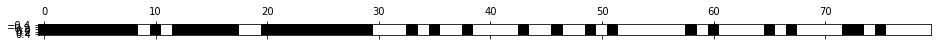

In [18]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [20]:
# true means that the feature has been selected, also the black in the graph

In [21]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('The score of logistic regression on all features: {:.3f}'.format(logreg.score(X_test,y_test)))
logreg.fit(X_train_selected,y_train)
print('The score of logistic regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected,y_test)))



The score of logistic regression on all features: 0.916
The score of logistic regression on the selected features: 0.919
/home/ghassen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ghassen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

In [22]:
# 2/ Model base feature selection 
# - uses supervised model to determine the importance of each feature 
# - keeps the most important features 
# - needs a measure for the importance of each feature (DT and RF have the 'feature importances' attribute)

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold='median')


In [32]:
select.fit(X_train,y_train)
X_train_s = select.transform(X_train)
print('the shape of X_train is :',X_train.shape)
print('the shape of X_train_s is :',X_train_s.shape)

the shape of X_train is : (284, 80)
the shape of X_train_s is : (284, 40)


Text(0.5, 0, 'Index of features')

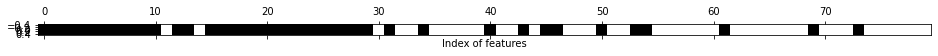

In [33]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Index of features')

In [36]:
X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s,y_train).score(X_test_s,y_test)
print('The score of logistic regression with the selected features on the test set: {:.3f}'.format(score))

The score of logistic regression with the selected features on the test set: 0.930
/home/ghassen/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
